In [49]:
import pandas as pd
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('loan_data.csv')

In [30]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [31]:
data.shape

(45000, 14)

In [34]:
data_1 = data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data_1.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_1.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (40500, 14)
Unseen Data For Predictions: (4500, 14)


In [35]:
data_1.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [40]:
data_1.duplicated().sum()

0

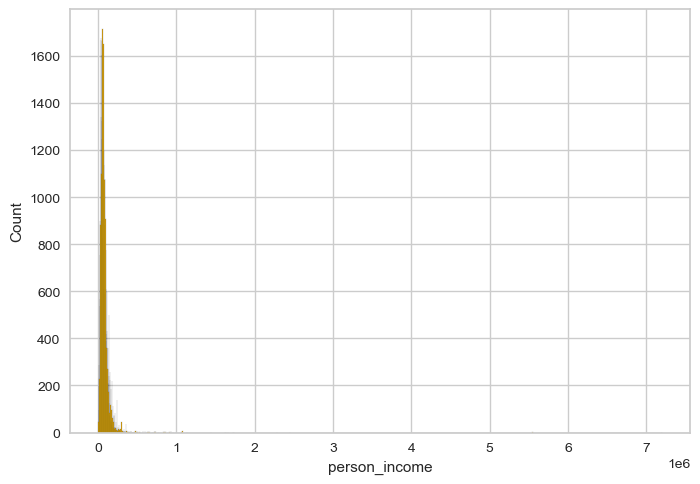

In [50]:
sns.histplot(data=data_1,x='person_income')
plt.show()

In [69]:
earning_over_1million = data_1[data_1['person_income'] > 1000000]
print (len(earning_over_1million))
print(earning_over_1million.index)

21
Index([ 6090,  7808,  9809, 11490, 12500, 14047, 15421, 17976, 19865, 20924,
       22222, 22547, 25519, 27342, 31063, 31880, 33779, 34796, 39128, 39757,
       40071],
      dtype='int64')


In [71]:
data_1 = data_1.drop(earning_over_1million.index).reset_index(drop=True)

In [72]:
data_1.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.0,female,High School,61020.0,6,RENT,7300.0,MEDICAL,7.29,0.12,9.0,638,No,0
1,25.0,female,Bachelor,78690.0,0,OWN,12000.0,PERSONAL,13.48,0.15,4.0,692,No,0
2,37.0,male,Master,168825.0,15,MORTGAGE,14000.0,HOMEIMPROVEMENT,7.51,0.08,12.0,692,No,0
3,26.0,female,Associate,107787.0,4,MORTGAGE,8000.0,HOMEIMPROVEMENT,10.99,0.07,2.0,664,No,0
4,31.0,male,Master,44334.0,5,RENT,4000.0,MEDICAL,13.80,0.09,9.0,656,No,0


In [73]:
exp_reg101 = setup(data = data_1, target = 'credit_score', session_id=123)

,Description,Value
0,Session id,123
1,Target,credit_score
2,Target type,Regression
3,Original data shape,"(40479, 14)"
4,Transformed data shape,"(40479, 26)"
5,Transformed train set shape,"(28335, 26)"
6,Transformed test set shape,"(12144, 26)"
7,Numeric features,8
8,Categorical features,5
9,Preprocess,True


In [74]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,38.0834,2245.9532,47.3866,0.1173,0.0776,0.0622,0.6570
ridge,Ridge Regression,38.0834,2245.9465,47.3865,0.1173,0.0776,0.0622,0.0890
br,Bayesian Ridge,38.0828,2245.8654,47.3857,0.1173,0.0776,0.0622,0.0900
gbr,Gradient Boosting Regressor,38.1999,2258.1051,47.5151,0.1125,0.0778,0.0624,1.2220
lightgbm,Light Gradient Boosting Machine,38.4032,2281.8451,47.7637,0.1032,0.0782,0.0627,0.4330
llar,Lasso Least Angle Regression,38.4152,2286.9848,47.8175,0.1012,0.0783,0.0627,0.0790
lasso,Lasso Regression,38.4152,2286.9853,47.8175,0.1012,0.0783,0.0627,0.1090
en,Elastic Net,39.1399,2376.2434,48.7425,0.0661,0.0798,0.0639,0.0960
rf,Random Forest Regressor,39.2912,2389.5206,48.8786,0.0608,0.0798,0.0640,4.0350
xgboost,Extreme Gradient Boosting,39.3660,2417.5641,49.1644,0.0498,0.0803,0.0642,0.1800


LinearRegression(n_jobs=-1)

In [ ]:
#Mean absoloute error
#Mean Squared error
#R2 Should be close to 1

In [77]:
#linear regression
lR = create_model('lr')
#Fold way to evulate your model(kfold) 
#Cross validation
#Train model 9 times to ensure good data isnt only existed in only train or only test

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.2156,2245.5328,47.3871,0.1310,0.0777,0.0624
1,39.2284,2361.4975,48.5952,0.0968,0.0799,0.0645
2,38.0697,2202.3271,46.9290,0.1218,0.0766,0.0618
3,37.7242,2235.1779,47.2777,0.1237,0.0776,0.0617
4,38.5928,2266.1193,47.6038,0.1136,0.0777,0.0629
5,37.7472,2186.0851,46.7556,0.1415,0.0765,0.0615
6,38.8429,2370.6576,48.6894,0.1076,0.0801,0.0638
7,37.1511,2191.1209,46.8094,0.1068,0.0766,0.0605
8,37.7013,2206.6857,46.9754,0.1107,0.0766,0.0613


In [80]:
#Tune models
tuned_lr = tune_model(lR)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.2156,2245.5328,47.3871,0.1310,0.0777,0.0624
1,39.2284,2361.4975,48.5952,0.0968,0.0799,0.0645
2,38.0697,2202.3271,46.9290,0.1218,0.0766,0.0618
3,37.7242,2235.1779,47.2777,0.1237,0.0776,0.0617
4,38.5928,2266.1193,47.6038,0.1136,0.0777,0.0629
5,37.7472,2186.0851,46.7556,0.1415,0.0765,0.0615
6,38.8429,2370.6576,48.6894,0.1076,0.0801,0.0638
7,37.1511,2191.1209,46.8094,0.1068,0.0766,0.0605
8,37.7013,2206.6857,46.9754,0.1107,0.0766,0.0613


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
decision_tree = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,54.5653,4746.5011,68.8949,-0.8368,0.1128,0.0885
1,53.7452,4630.6789,68.0491,-0.7710,0.1117,0.0873
2,53.0374,4526.2555,67.2775,-0.8048,0.1100,0.0856
3,54.6648,4759.6196,68.9900,-0.8660,0.1133,0.0888
4,53.9128,4725.3109,68.7409,-0.8484,0.1127,0.0872
5,53.8390,4677.9513,68.3956,-0.8371,0.1119,0.0871
6,54.7843,4805.2340,69.3198,-0.8088,0.1139,0.0891
7,55.5178,4943.0194,70.3066,-1.0151,0.1154,0.0895
8,53.9795,4662.7038,68.2840,-0.8790,0.1118,0.0870


In [84]:
tuned_decision_tree = tune_model(decision_tree)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.3091,2352.2341,48.4998,0.0897,0.0798,0.0633
1,39.2908,2483.0741,49.8305,0.0503,0.0822,0.0653
2,38.0609,2276.5544,47.7133,0.0923,0.0781,0.0625
3,37.9065,2342.4515,48.3989,0.0817,0.0797,0.0626
4,38.5663,2353.2414,48.5102,0.0795,0.0795,0.0635
5,37.8189,2292.3611,47.8786,0.0998,0.0786,0.0623
6,39.0694,2487.7451,49.8773,0.0636,0.0822,0.0649
7,37.1078,2278.9050,47.7379,0.0710,0.0784,0.0611
8,37.8191,2309.1367,48.0535,0.0694,0.0786,0.0621


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [85]:
save_model(tuned_decision_tree,'Decision tree to predict credit score')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['person_age', 'person_income',
                                              'person_emp_exp', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length',
                                              'loan_status'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['person_gender',
                                              'person_education',...
                                              'person_home_ownership',
                                              'loan_intent'],
                                     transformer=OneHotEncoder(cols=['person_education',
                                  

In [86]:
final_model = finalize_model(tuned_decision_tree)

In [87]:
save_model(final_model,'Decision tree to predict credit score')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['person_age', 'person_income',
                                              'person_emp_exp', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length',
                                              'loan_status'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['person_gender',
                                              'person_education',...
                                              'person_home_ownership',
                                              'loan_intent'],
                                     transformer=OneHotEncoder(cols=['person_education',
                                  